In [1]:
#import required libries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import the required files and parse datetime 

df= pd.read_csv('C:/Users/Owner/Desktop/discover/Freecodecamp Projects/\
4/fcc-forum-pageviews.csv',parse_dates=['date'])

df.info()
#NB: Data has a;ready been cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1304 non-null   datetime64[ns]
 1   value   1304 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 20.5 KB


In [3]:
#filter top and bottom 2.5 percents 
df =df[(df['value'] >= df['value'].quantile(0.025)) &
       (df['value'] <= df['value'].quantile(0.925))]

##LINE PLOT 

Text(0, 0.5, 'Page Views')

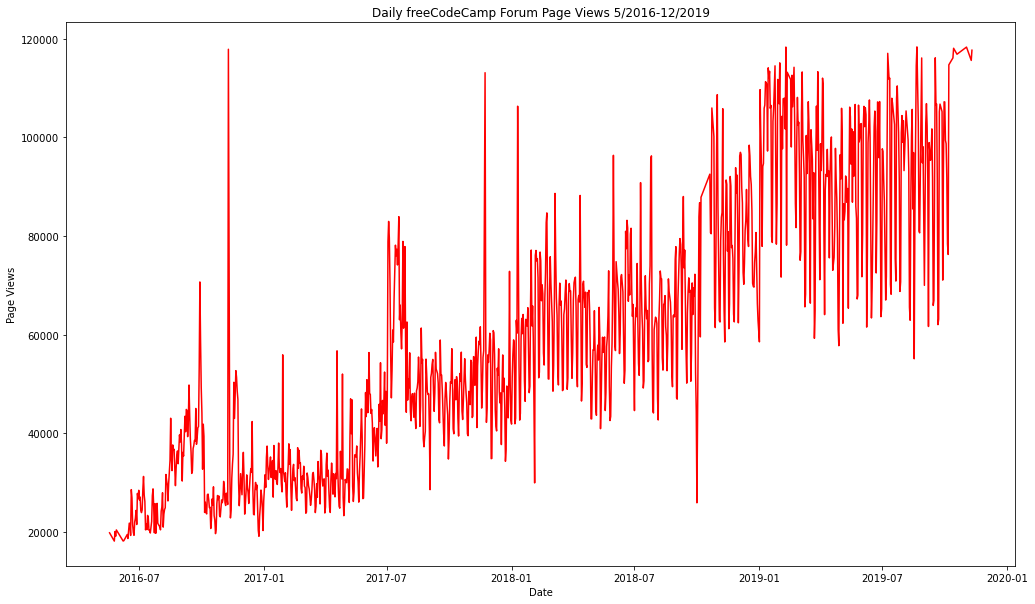

In [4]:
#plot
fig = plt.figure(figsize =(17,10))
plt.plot(df['date'], df['value'], 'r')
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

fig.savefig('line_plot.png')

##BARPLOT 

In [5]:
#Add month and year columns in the pandas data set
df['month']= df['date'].dt.month_name()
df['year'] = pd.DatetimeIndex(df['date']).year

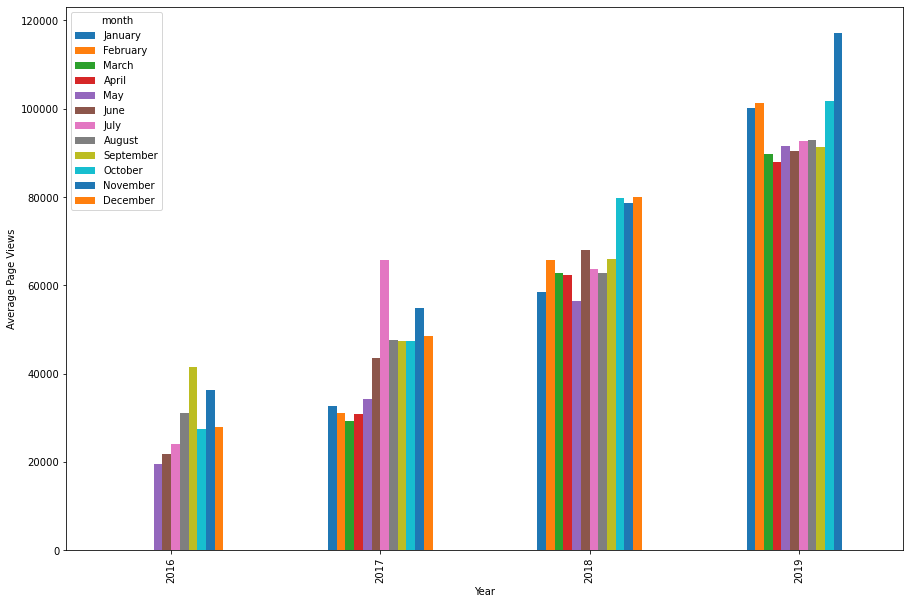

In [6]:
#create a pandas dataframe for the barplot
df_bar = pd.DataFrame(df.groupby(['year', 'month'])['value'].mean()).rename(columns=
            {'value': 'total'}).reset_index()

#use the pivot function to unmelt the df_bar to convert to a long wide format  
df_bar= df_bar.pivot(index='year', columns='month', values='total')

#reindex the column names by order of month 
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar.reindex(columns=months)

#barplot
fig = df_bar.plot(kind= 'bar', figsize = (15,10),xlabel = 'Year', ylabel = 'Average Page Views').figure

#save barplot 
fig.savefig('bar_plot.png')


##BOXPLOT 

In [7]:
#create dataframe for boxplot 
df_box = df.copy()
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df['year'] = pd.DatetimeIndex(df['date']).year
df_box.head(5)

,date,value,month,year
10,2016-05-19,19736,May,2016
17,2016-05-26,18060,May,2016
18,2016-05-27,19997,May,2016
19,2016-05-28,19044,May,2016
20,2016-05-29,20325,May,2016


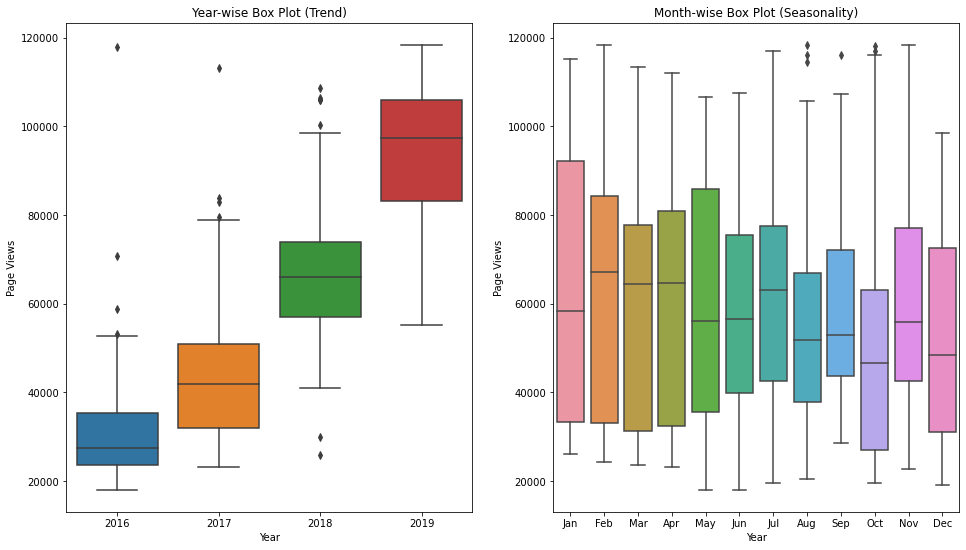

In [8]:
fig,(ax1, ax2) = plt.subplots(1, 2, figsize = (16, 9))

sns.boxplot(x="year", y="value", data=df_box, ax=ax1
           ).set(title = "Year-wise Box Plot (Trend)", 
           xlabel = 'Year', ylabel = 'Page Views')

sns.boxplot(x="month", y="value", data=df_box, ax=ax2,
            order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov', 'Dec']).set(
            title = "Month-wise Box Plot (Seasonality)", 
            xlabel = 'Year', 
            ylabel = 'Page Views')

fig.savefig('box_plot.png')